In [26]:
import numpy as np
import random
import time
from IPython.display import clear_output
import gym
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import deque

In [27]:
env = gym.make("FrozenLake-v0")

In [28]:
def calculateAvgReward(num_episodes,avg_num_episodes,rewards_all_episodes):
        results = []
        rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/avg_num_episodes)
        count = avg_num_episodes
        for r in rewards_per_thousand_episodes:
#             avg_per_thousand_episode = str(sum(r/self.avg_num_episodes))
            sum_of_rewards = sum(r/avg_num_episodes)
            results.append({"episode":count,"reward":sum_of_rewards})
            count += avg_num_episodes
        return results
    
def createLinePlotForRewards(results,avg_num_episodes):
        df = pd.DataFrame(results)
        fig, ax1 = plt.subplots(figsize=(12, 8))
        sns.lineplot(data=df, x="episode", y="reward", ax=ax1, ci=None)
        ax1.set_ylabel('Rewards',fontsize=13)
        ax1.set_xlabel('Episodes',fontsize=13)
        ax1.set_title("Average reward per "+str(avg_num_episodes)+" episodes",fontsize=16)

In [29]:
class Agent:
    def __init__(self):
        self.num_episodes = 10000
        self.avg_num_episodes = round(self.num_episodes/10)
        self.learning_rate = 0.1
        self.discount_rate = 0.99
        self.exploration_rate = 1
        self.max_exploration_rate = 1
        self.min_exploration_rate = 0.01
        self.exploration_decay_rate = 0.001
        self.q_table = self.buidl_q_table()
    
    def buidl_q_table(self):
        action_space_size = env.action_space.n
        state_space_size = env.observation_space.n
        q_table = np.zeros((state_space_size, action_space_size))
        return q_table
    
    def q_learning(self, ic_count = 1):
        rewards_all_episodes = []
        

        # Q-Learning algorithm
        for episode in range(self.num_episodes):
            state = env.reset()
            clear_output(wait=True)
            print("*****EPISODE ", episode+1, "*****\n\n\n\n")

            done = False
            rewards_current_episode = 0
            
            state_action_pairs = deque()

            while not done: 

                if done == True: 
                    break
                else:
                    # Exploration-exploitation trade-off
                    self.exploration_rate_threshold = random.uniform(0, 1)
                    if self.exploration_rate_threshold > self.exploration_rate:
                        action = np.argmax(self.q_table[state,:]) # Exploitation
                    else:
                        action = env.action_space.sample() # Exploration

                    new_state, reward, done, info = env.step(action)
                    
                    
                    state_action_pairs.append((state,new_state,action,reward))
                    
                    if ic_count < len(state_action_pairs):
                        state_action_pairs.popleft()
                    
                    self.intermittentLearning(state_action_pairs)
                    
                    state = new_state
                    rewards_current_episode += reward

            # Exploration rate decay
            self.exploration_rate = self.min_exploration_rate + \
                (self.max_exploration_rate - self.min_exploration_rate) * np.exp(-self.exploration_decay_rate*episode)

            rewards_all_episodes.append(rewards_current_episode)

        results = calculateAvgReward(self.num_episodes,self.avg_num_episodes,rewards_all_episodes)
        createLinePlotForRewards(results,self.avg_num_episodes)
        
    def intermittentLearning(self,state_action_pairs):
            
        for previous_state,current_state,action,reward in state_action_pairs:

            self.sarsaEquation(previous_state,current_state,action,reward)
            
    def sarsaEquation(self,previous_state,current_state,action,reward):
        # Update Q-table for Q(s,a)
        self.q_table[previous_state, action] = self.q_table[previous_state, action]  + \
                    self.learning_rate * \
                (reward + self.discount_rate * np.max(self.q_table[current_state, :]) - self.q_table[previous_state, action])
                


*****EPISODE  10000 *****






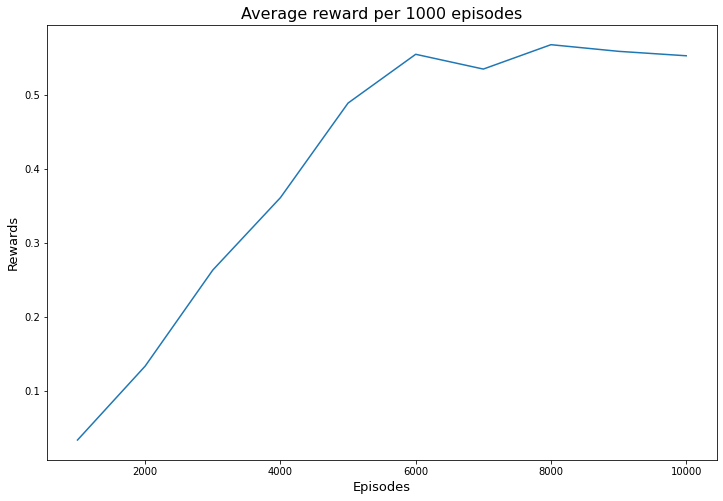

In [30]:
agent = Agent()
agent.q_learning(ic_count = 5)